# Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### *Features of interest*

* Age
* Job 
* Marital status 
* Education 
* Default status : Does the customer has credit in default?
* Balance : Avg. yearly balance 
* Housing : Has housing loan?
* Loan : Has personal loan 
* Contact : Contact communication type
* Day : Last contact day of the month 
* Month : Last contact month of the year 
* Duration : Last contact duration, in seconds
* Campaign : No. of contacts performed during this campaign and for this client
* Pdays : No. of days that passed by after the client was last contacted from a previous campaign
* Previous : No. of contacts performed before this campaign and for this client
* Poutcome : Outcome of the previous marketing campaign

In [1]:
#Importing our basic dependencies
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

sns.set_style("whitegrid")
sns.set_palette(sns.diverging_palette(10, 220, sep=80, n=10))

In [2]:
#Reading in the dataset 
df = pd.read_csv('/home/sauraj/Downloads/bank-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
#Descriptive statistics on the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
#Does the dataset have any missing values 
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

y            0.0
loan         0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
contact      0.0
poutcome     0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
age          0.0
dtype: float64

In [5]:
#What is the dataset like?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* **int64** dtypes are all discrete values and will be handled by checking for outliers, normality and statistical significance

* **object** dtypes are all categorical variables and will be converted to numerical data in order for classification algorithms to better understand the meaning behind the dataset and then predict the classifications

## Exploratory Data Analysis

EDA is an important part of data analysis as it helps to catch patterns in the dataset which shall be useful for creating new features, removing data problems and refining the dataset before it can be processed further

In [6]:
#Discretize the values for the predictor variable
df['y']=df['y'].apply(lambda x:1 if x=='yes' else 0)

#### Histogram exploration gives us an idea about the normality of integer based features and helps in assessing if they pose any particular problems or not

(array([3.7516e+04, 2.2990e+03, 2.1540e+03, 1.8250e+03, 1.2290e+03,
        9.8000e+01, 3.9000e+01, 1.8000e+01, 1.8000e+01, 1.5000e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <a list of 10 Patch objects>)

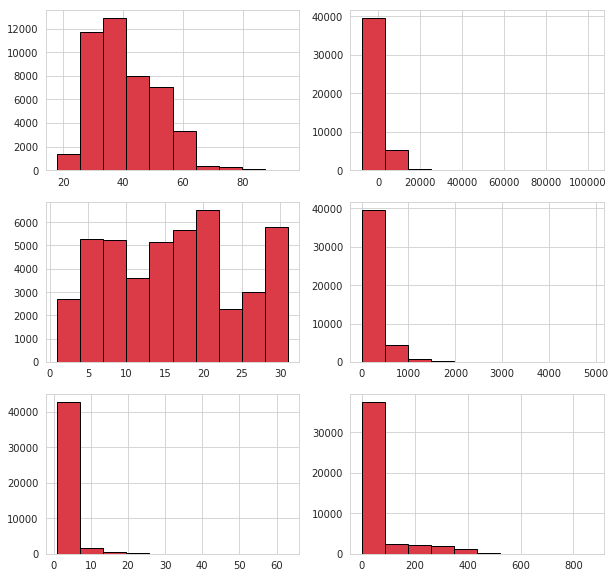

In [7]:
#Histogram for integer values 
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))
ax1.hist(df.age, edgecolor='black')
ax2.hist(df.balance, edgecolor='black')
ax3.hist(df.day, edgecolor='black')
ax4.hist(df.duration, edgecolor='black')
ax5.hist(df.campaign, edgecolor='black')
ax6.hist(df.pdays, edgecolor='black')

#### What is the Job Count frequency for each job?

Text(0.5,1,'Job counts')

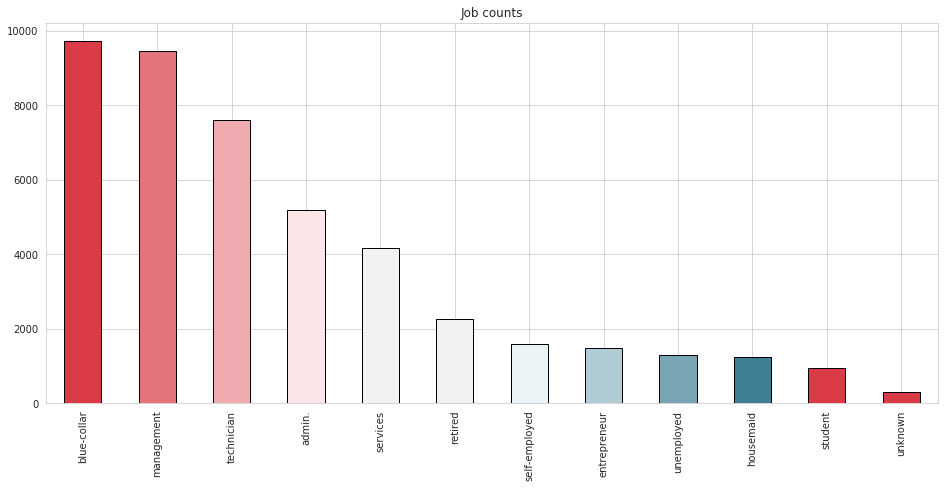

In [8]:
fig = plt.figure(figsize=(16,7))
df['job'].value_counts().plot(kind="bar", edgecolor='black')
plt.title("Job counts")

#### What is the Marital status count for each marital type?

Text(0.5,1,'Marital status')

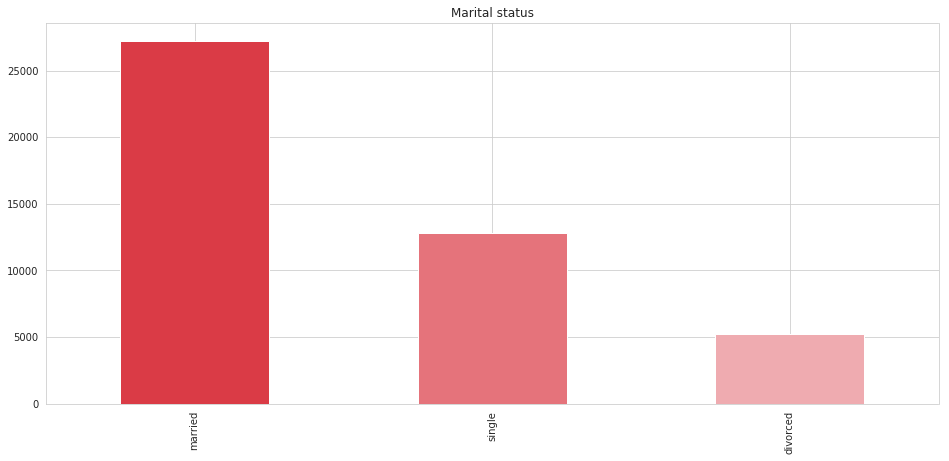

In [9]:
fig = plt.figure(figsize=(16, 7))
df['marital'].value_counts().plot(kind="bar")
plt.title("Marital status")

#### What is the Education status count?

Text(0.5,1,'Education status')

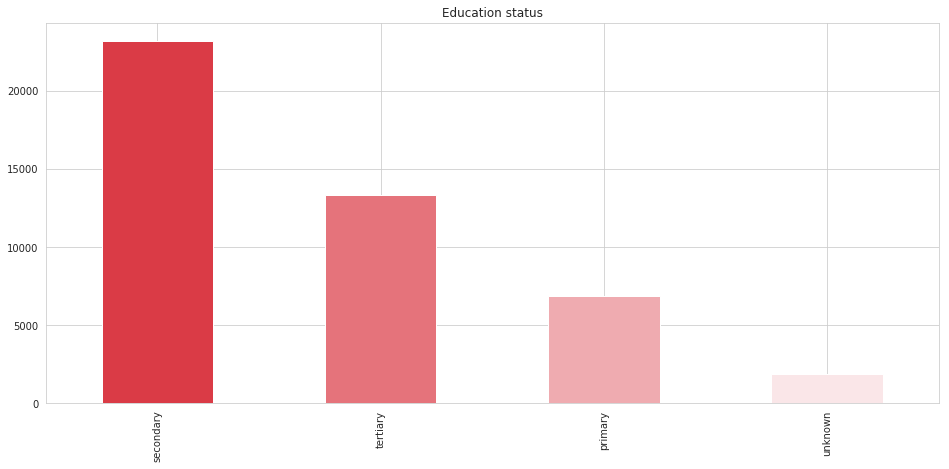

In [10]:
fig = plt.figure(figsize=(16, 7))
df['education'].value_counts().plot(kind="bar")
plt.title("Education status")

#### How many customers had credit default in their accounts?

Text(0.5,1,'How many had credit defaults?')

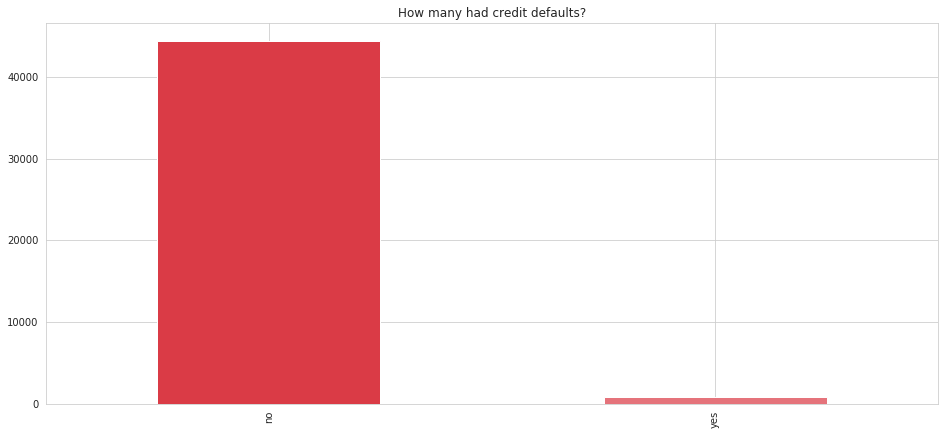

In [11]:
fig = plt.figure(figsize=(16, 7))
df['default'].value_counts().plot(kind='bar')
plt.title('How many had credit defaults?')

### What was the median bank balance of each customer on the basis of job they have?

Text(0.5,1,'Median balance across jobs')

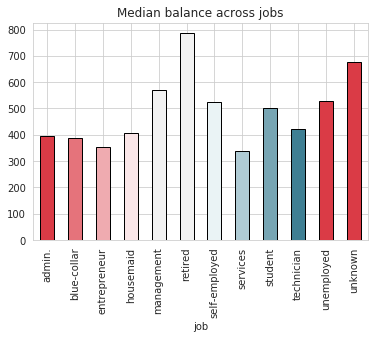

In [12]:
df.groupby('job')['balance'].median().plot(kind='bar', edgecolor='black')
plt.title("Median balance across jobs")

### What mode of communication was used to reach out to customers?

Text(0.5,1,'How long did the contact last?')

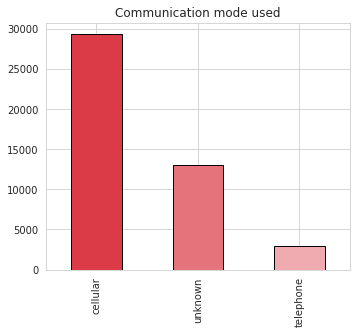

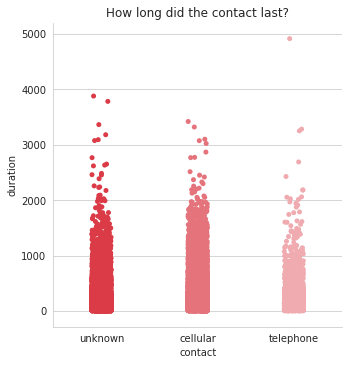

In [13]:
"""
What modes of communication were used, and how long were the 
duration of these communication mediums?
"""
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid((2, 2), (0, 1))
df['contact'].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Communication mode used")

sns.catplot(x="contact", y="duration", data=df)
plt.title("How long did the contact last?")

Text(0.5,1,'Most contacts per month')

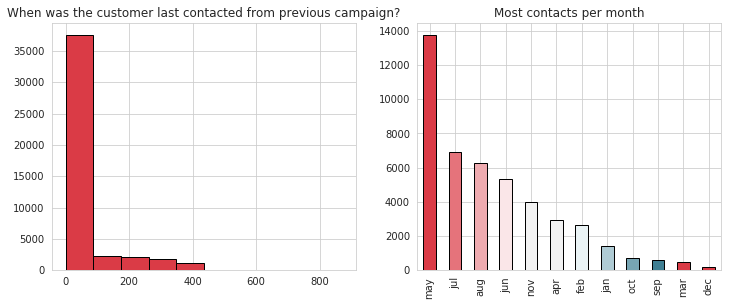

In [14]:
#Number of days passed by after the client was last contacted
df['pdays'] = df.pdays.replace(-1, 0)

fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.hist(df.pdays, edgecolor='black')
plt.title("When was the customer last contacted from previous campaign?")

ax2 = plt.subplot2grid((2,2),(0,1))
df['month'].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Most contacts per month")

Text(0.5,1,'Median account balance for marital status/education')

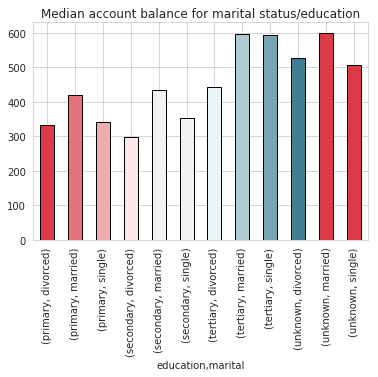

In [15]:
marital_median = df.groupby(['education','marital'])['balance'].median()
marital_median.plot(kind='bar', edgecolor='black')
plt.title('Median account balance for marital status/education')

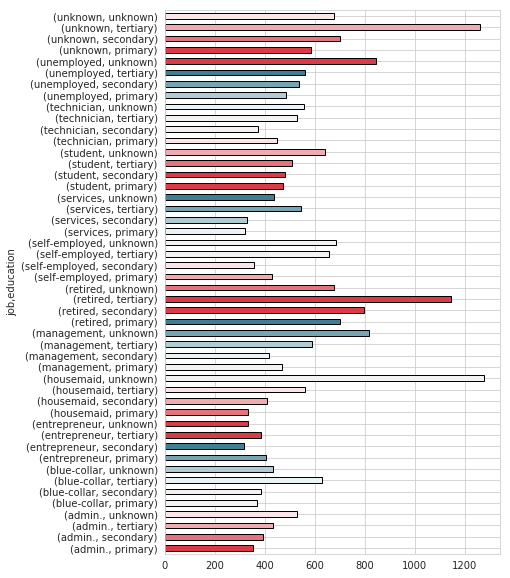

In [16]:
fig = plt.figure(figsize=(6, 10))
job_median = df.groupby(['job','education'])['balance'].median()
job_median.plot(kind='barh', edgecolor='black')

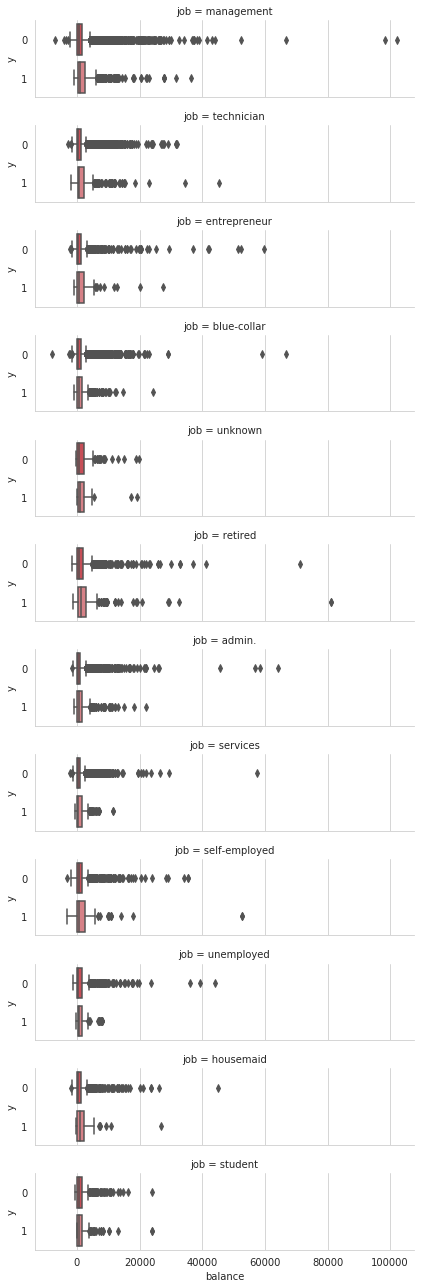

In [17]:
#The average bank balance for each job category, on the basis of their churn status
g = sns.catplot(x="balance", y="y", row="job", kind="box", orient="h", data=df,
               height=1.5, aspect=4)

Text(0.5,1,'How was the balance affecting the calls?')

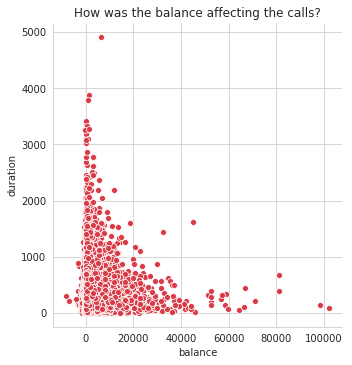

In [18]:
sns.relplot(x="balance",y="duration", data=df)
plt.title("How was the balance affecting the calls?")

Text(0.5,1,'How was camapign contact affecting call duration?')

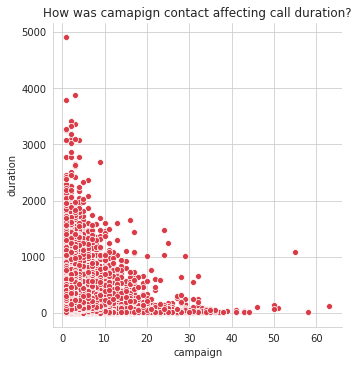

In [19]:
sns.relplot(x="campaign",y="duration", data=df)
plt.title("How was camapign contact affecting call duration?")

## Data Preprocessing & Feature Engineering

The next step after EDA is to re-engineer the dataset according to needs which will suit for machine learning process and allow for a clean representation of the dataset for any further analysis

In [20]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,0,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,0,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,0,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,0,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,0,0,unknown,0


### Age 

In [21]:
df['age'].value_counts(bins=5)

(33.4, 48.8]                  20940
(17.921999999999997, 33.4]    13083
(48.8, 64.2]                  10378
(64.2, 79.6]                    680
(79.6, 95.0]                    130
Name: age, dtype: int64

In [22]:
#Bin various age ranges into classification groups
df.loc[(df['age'] >= 18) & (df['age'] <= 34), 'age'] = 1
df.loc[(df['age'] >= 35) & (df['age'] <= 50), 'age'] = 2
df.loc[(df['age'] >= 51) & (df['age'] <= 65), 'age'] = 3
df.loc[(df['age'] >= 66) & (df['age'] <= 80), 'age'] = 4
df.loc[(df['age'] >= 81) & (df['age'] <= 95), 'age'] = 5

df['age'] = df['age'].astype('int')

### Job

In [23]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [24]:
#Coding jobs into various numerical categories
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['job'])
df['job'] = encoder.transform(df['job'])
encoder.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

### Marital 

In [25]:
encoder.fit(df['marital'])
df['marital'] = encoder.transform(df['marital'])

### Education

In [26]:
encoder.fit(df['education'])
df['education'] = encoder.transform(df['education'])

### Default , Housing, Loan

In [27]:
df['default'] = df['default'].apply(lambda x:1 if x == 'yes' else 0)
df['housing'] = df['housing'].apply(lambda x:1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x:1 if x == 'yes' else 0)

### Contact 

In [28]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
df.loc[df['contact'] == 'unknown', 'contact'] = 0
df.loc[df['contact'] == 'cellular', 'contact'] = 1
df.loc[df['contact'] == 'telephone', 'contact'] = 2

### Poutcome

In [30]:
df.loc[df['poutcome'] == 'unknown', 'poutcome'] = 0
df.loc[df['poutcome'] == 'failure', 'poutcome'] = 1
df.loc[df['poutcome'] == 'other', 'poutcome'] = 2
df.loc[df['poutcome'] == 'success', 'poutcome'] = 3

### Month

In [31]:
encoder.fit(df['month'])
df['month'] = encoder.transform(df['month'])

### Pdays

"Pdays" feature represents the number of days that passed after the client was last contacted from a previous campaign. Because these are discrete values, its better to bin them into month wise categories

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,0,5,8,261,1,0,0,0,0
1,2,9,2,1,0,29,1,0,0,5,8,151,1,0,0,0,0
2,1,2,1,1,0,2,1,1,0,5,8,76,1,0,0,0,0
3,2,1,1,3,0,1506,1,0,0,5,8,92,1,0,0,0,0
4,1,11,2,3,0,1,0,0,0,5,8,198,1,0,0,0,0
5,2,4,1,2,0,231,1,0,0,5,8,139,1,0,0,0,0
6,1,4,2,2,0,447,1,1,0,5,8,217,1,0,0,0,0
7,2,2,0,2,1,2,1,0,0,5,8,380,1,0,0,0,0
8,3,5,1,0,0,121,1,0,0,5,8,50,1,0,0,0,0
9,2,9,2,1,0,593,1,0,0,5,8,55,1,0,0,0,0


## Predictive Modelling

Now that the dataset has been cleaned and processed appropriately, the next step is to choose a range of classifiers which will be used to assess the metrics of prediction and determine which one of the classifiers will be the optimal classifier for predicting if the client subscribes to a term deposit.

In [33]:
#Model building dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score

#Predictive model dependencies 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

Before the model building part begins, it is important to generate an **Out of Sample** dataset which will be the true _testing_ dataset for checking if the model is accurate or not. Hence the data will be split into 20% for the OOS set and the rest 80% will be used for obtaining training and testing splits.

In [34]:
#Obtain a train and validation dataset 
train, validation = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
#Now split the training dataset into a train-test split 
X = train.drop(['y'], axis=1)
y = train['y']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

To ease down on writing more code and make the workflow more clutter free, writing functions always helps due to its reusability and efficieny.

In [37]:
#Obtain the 5-fold CV for all the models and store them in a CSV
mean_cvscores =[]
accuracy = []
deviation = []

classifiers = ['Logistic Regression', 'DecisionTree','KNN','RandomForest',
              'BaggingClassifier']
models = [LogisticRegression(), DecisionTreeClassifier(),
         RandomForestClassifier(),KNeighborsClassifier(n_neighbors=5),
         BaggingClassifier()]

for i in models:
    model = i
    cv_results = cross_val_score(model, X, y, scoring='accuracy',
                                cv=5)
    cv_results = cv_results
    mean_cvscores.append(cv_results.mean())
    accuracy.append(cv_results)
    deviation.append(cv_results.std())
    
model_df = pd.DataFrame({'CV_mean':mean_cvscores,'Std':deviation},index=classifiers)       

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [38]:
model_df

,CV_mean,Std
Logistic Regression,0.899248,0.001617
DecisionTree,0.871765,0.001687
KNN,0.898087,0.002532
RandomForest,0.879839,0.002066
BaggingClassifier,0.898972,0.001705


Seems like Bagging, KNN and Logistic Regression performed the best on this data. Hence, it might be more better to use parsimonious models here rather than to go for complex models such as Ensemble learners

Text(0.5,1,'Mean CV scores of the classifiers')

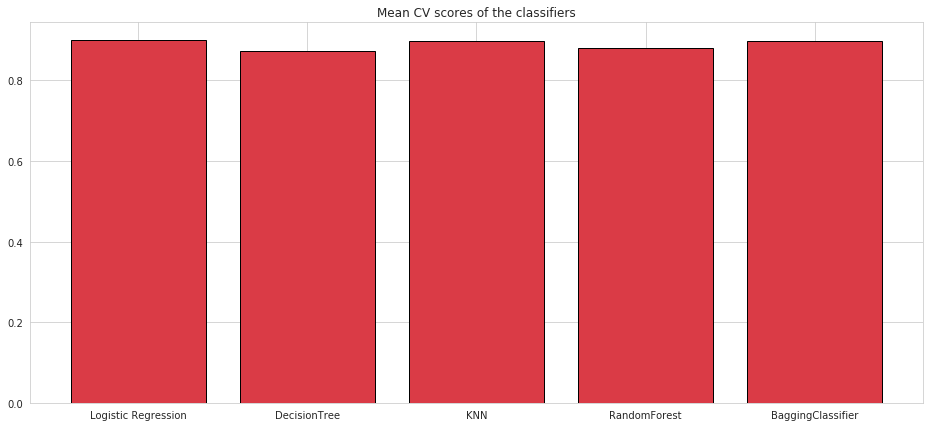

In [39]:
plt.figure(figsize=(16, 7))
plt.bar(classifiers, model_df['CV_mean'], edgecolor='black')
plt.title("Mean CV scores of the classifiers")

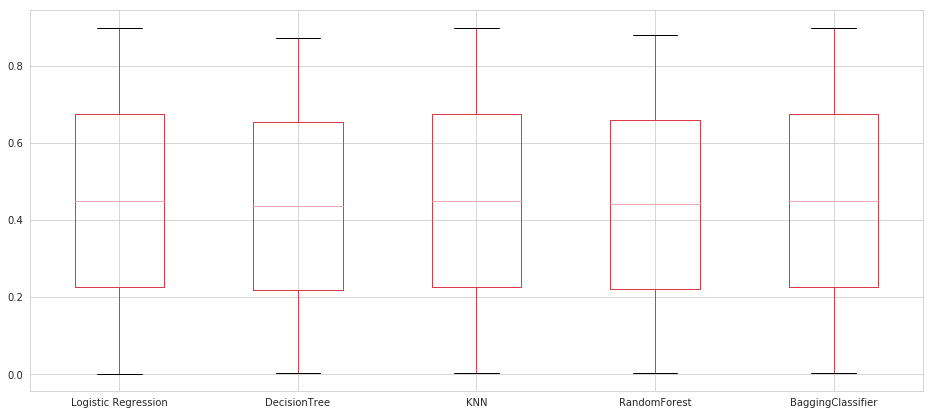

In [40]:
plt.figure(figsize=(16, 7))
model_df.T.boxplot()

In [41]:
#Define a function to train and test instantly

logreg = LogisticRegression()
knn = KNeighborsClassifier()
bag = BaggingClassifier()

"""
Class object is used when a variable from one function is to be
used in another function.
"""

def predictor(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)   
    print("Accuracy for the classifier: ", score)
    return sns.heatmap(cm, annot=True, fmt='2.0f')

### Logistic Regression

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for the classifier:  0.8983964611556539


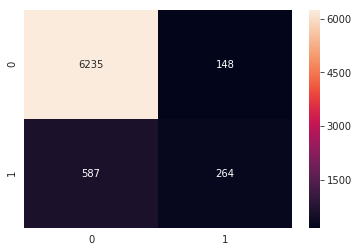

In [42]:
predictor(logreg, X_train, X_test, y_train, y_test)

### KNN

Accuracy for the classifier:  0.8787669339231408


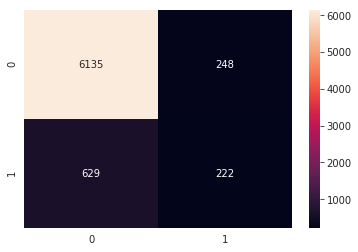

In [43]:
predictor(knn, X_train, X_test, y_train, y_test)

### Bagging

Accuracy for the classifier:  0.896599391761128


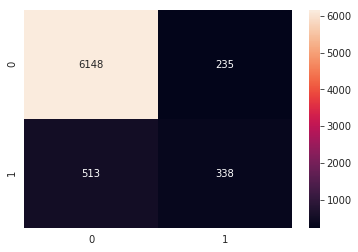

In [44]:
predictor(bag, X_train, X_test, y_train, y_test)

### KNN is an instance-based learning algorithm which uses distance as one of its measures to determine accurate classifications. Because there are some discrete variables of different ranges, it is better if those are normalized in order to bring all of them in one uniform range.

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_knn = scaler.transform(X)
X_knn_df = pd.DataFrame(X_knn)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
#Setting random_state parameter same as the original train-test
#split allows for reproducability
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn_df, y, test_size=0.2, random_state=44)

Accuracy for the classifier:  0.8878905170030412


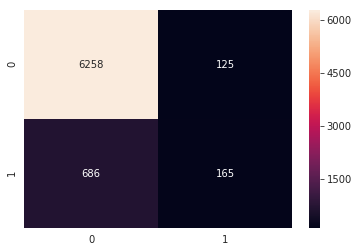

In [47]:
predictor(knn, X_knn_train, X_knn_test, y_knn_train, y_knn_test)

#### How does the accuracy of KNN go around when the number of neighbors are altered?

In [48]:
index = list(range(1, 101))
neighbor_scores = []
for neighbors in index:
    knn_kk = KNeighborsClassifier(n_neighbors=neighbors)
    knn_kk.fit(X_train, y_train)
    pred_value = knn_kk.predict#### Accuracy Metrics for Logistic Regression(X_test)
    neighbor_scores.append(accuracy_score(y_test, pred_value))

Text(0.5,1,'Accuracy score with varying neighbors')

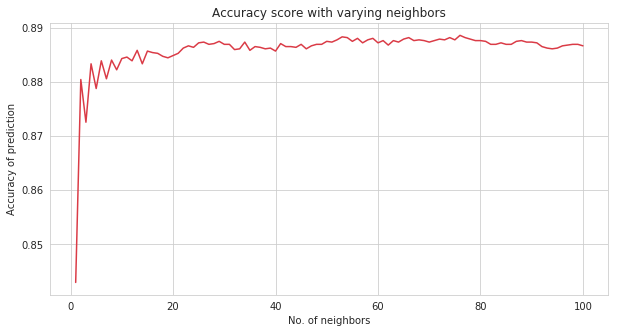

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(index, neighbor_scores)
plt.xlabel("No. of neighbors")
plt.ylabel("Accuracy of prediction")
plt.title("Accuracy score with varying neighbors")

In [50]:
print("Max achieveable accuracy on KNN: ", np.max(neighbor_scores))

Max achieveable accuracy on KNN:  0.8885816975393973


### Cost-Benefit Analysis using Classification metrics

Being a marketing problem, the central goal here is to determine which **whether the customer will subscribe to a term deposit or not**. With the three classifiers chosen for the dataset, it needs to be determined which one of the classifiers gives the most catch on customer churn while minimizing the loss of misclassifications.

_Metrics of interest_
* Sensitivity
* Specificity
* Precision
* Recall
* AUC 

In [51]:
lolz = np.array([[1, 2], [3, 4]])
lolz

array([[1, 2],
       [3, 4]])

In [58]:
lolz[1, 1]

4

In [59]:
#Import classification metric modules
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

def metric_calc(model, X_train, X_test, y_train, y_test):
    #Reusing code from predictor() function
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)   
    
    sensitivity = (cm[0,0] / (cm[0, 0] + cm[0, 1])) * 100
    specificity = (cm[1, 1] / (cm[1, 0] + cm[1, 1])) * 100
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    print("Accuracy metrics for the classifier\n")
    print("\n Sensitivity: ", sensitivity)
    print("\n Specificity: ", specificity)
    print("\n Precision Score: ", precision)
    print("\n Recall Score: ", recall)
    


#### Accuracy Metrics for Logistic Regression

In [60]:
metric_calc(logreg, X_train, X_test, y_train, y_test)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy metrics for the classifier


 Sensitivity:  97.68134106219645

 Specificity:  31.02232667450059

 Precision Score:  0.6407766990291263

 Recall Score:  0.3102232667450059


#### Accuracy Metrics for Bagging Classifier

In [61]:
metric_calc(bag, X_train, X_test, y_train, y_test)

Accuracy metrics for the classifier


 Sensitivity:  96.41234529218235

 Specificity:  39.9529964747356

 Precision Score:  0.5975395430579965

 Recall Score:  0.399529964747356
